# ML Metrics Understanding

This notebook will detail out various metrics used, how they work and other information along with their implementation ... let's go 

In [15]:
import numpy as np
import pandas as pd

actual = [1,2,3,4,5,6]
predicted = [1,3,4,4,5,9]

## Regression Metrics

### MAE

* calculates absolute difference between actual and predicted values, summed up for all observations and divided by total observations.
* The formula, $$MAE = \frac{1}{n}*\sum{\mid{{\text{actual} - \text{predicted}}}\mid}$$
* since, MAE does not squares the error, and all we have is just the difference, MAE is considered to be more robust to outliers (unlike MSE, RMSE).
* Let's see one important disadvantage of MAE
  * since MAE involves |x|, it is not differentiable at x = 0. However, at x > 0, it is 1 and at x < 0, it is -1.
  * **Gradient descent assumes loss is smooth and differentiable everywhere. Since, MAE is not differentiable at x = 0, we must handle it carefully.**
      * This is taken care by using subgradient and Huber loss. 

In [1]:
def mae(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    return np.mean(np.abs(actual - predicted))

print("MAE =", round(mae(actual, predicted),3))

MAE = 0.833


### MAPE (Mean Absolute Percentage Error)

* The formula, $$MAPE = \frac{1}{n}*\sum{\mid{\frac{\text{actual} - \text{predicted}}{\text{actual}}}\mid}$$
* The metric is scale independent and easy to interpret. These both serve as advantages of using this metric.
* One major **disadvantage** - it can produce infinite values for close to zero actual values.

In [2]:
def mape(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    return np.mean(np.abs((actual - predicted)/actual))

print("MAPE =", round(mape(actual, predicted),3))

MAPE = 0.222


### MSE (Mean Squared Error)

* The formula, $$MSE = \frac{1}{n}*\sum{(\text{actual} - \text{predicted})^2}$$
* The metric is differentiable, and thus, can be used as a loss function
* The metric penalizes the outliers most. **Hence, it is not robust to outliers like MAE. This metric should be used when outliers matter.**

In [3]:
def mse(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    return np.mean((actual - predicted)**2)

print("MSE =", round(mse(actual, predicted),3))

MSE = 1.833


### Root Mean Squared Error, RMSE

* The formula, $$\text{RMSE}= \sqrt{\sum{\frac{(y_i-y^{\text{pred}})^2}{n}}}$$
* Interpretation is better than MSE.

In [13]:
def rmse(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    return np.sqrt(np.mean((actual - predicted)**2))
    
print("RMSE =", round(rmse(actual, predicted),3))

RMSE = 1.354


### Coefficient of Determination, $R^2$

* Formula is given as, $$R^2 = 1-\frac{\sum{(y_i - y_i^{\text{predicted}})^2}}{\sum{(y_i - y_i^{\text{mean}})^2}} = 1 - \frac{\text{Residual Sum Squared}}{\text{Total Sum Squared}}$$
* It represents the proportion of the variance for a dependent variable that’s explained by an independent variable.

In [4]:
def r2_score(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    rss = np.sum((actual - predicted)**2)
    tss = np.sum((actual - np.mean(actual))**2)
    return 1-(rss/tss)
    
print("R2 score =", round(r2_score(actual, predicted),3))

R2 score = 0.371


### Adjusted-$R^2$

* Adjusts for the number of predictors in your regression model and is particularly useful when comparing models with different numbers of features.
* Formula, $$\text{Adjusted-}R^2=1-\frac{(1-R^2)(n-1)}{(n-k-1)}$$

#### But, why a new metric over $R^2$ ?

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

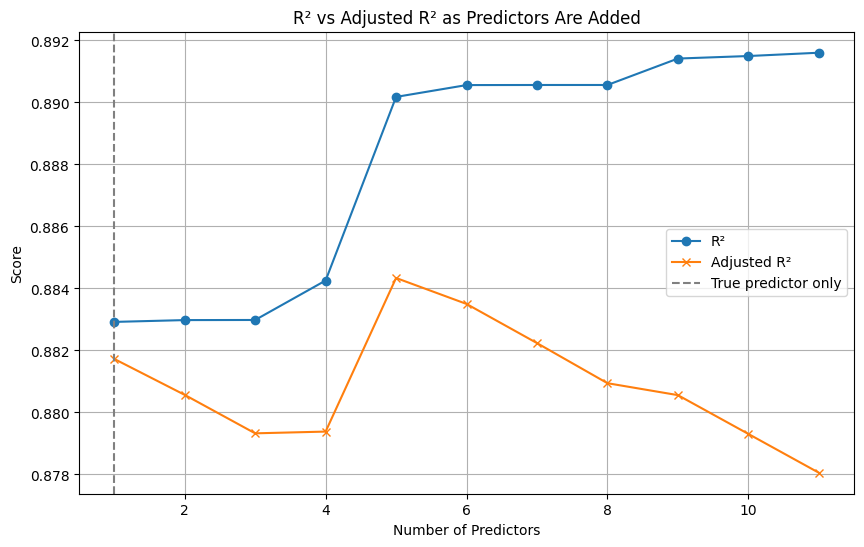

In [12]:
# Set random seed
np.random.seed(42)

# 1. Generate data
n_samples = 100
X_true = np.random.randn(n_samples, 1)  # the true predictor
noise = np.random.randn(n_samples, 1)
y = 3 * X_true.squeeze() + noise.squeeze()  # linear relationship

# Create noise predictors
X_noise = np.random.randn(n_samples, 10)  # 10 irrelevant predictors

# Combine all predictors
X_all = np.hstack([X_true] + [X_noise[:, i:i+1] for i in range(10)])

# Containers to track metrics
r2_scores = []
adj_r2_scores = []

# 2. Incrementally add predictors
for k in range(1, 12):  # from 1 to 11 predictors
    X_k = X_all[:, :k]
    
    model = LinearRegression().fit(X_k, y)
    y_pred = model.predict(X_k)
    r2 = r2_score(y, y_pred)
    
    n = len(y)
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
    
    r2_scores.append(r2)
    adj_r2_scores.append(adj_r2)

# 3. Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 12), r2_scores, label='R²', marker='o')
plt.plot(range(1, 12), adj_r2_scores, label='Adjusted R²', marker='x')
plt.axvline(1, color='gray', linestyle='--', label='True predictor only')
plt.xlabel('Number of Predictors')
plt.ylabel('Score')
plt.title('R² vs Adjusted R² as Predictors Are Added')
plt.legend()
plt.grid(True)
plt.show()

## Classification

### Confusion Matrix

In [18]:
label_name = {0:'Grapes', 1: 'Apples'}
actual = [1,1,1,1,1,1,1,1,0,0,0,0,0,0,0]
predicted = [1,0,0,0,1,1,1,1,0,0,0,0,0,1,1]

In [21]:
def confusion_matrix(actual, predicted, label_name, margins=False):
    actual = pd.Series(actual, name='Actual')
    predicted = pd.Series(predicted, name='Predicted')
    df_confusion = pd.crosstab(actual, predicted, 
                               rownames=['Actual'], 
                               colnames=['Predicted'], margins=margins)
    df_confusion.rename(index=label_name, columns=label_name, inplace=True)
    return df_confusion

df_confusion = confusion_matrix(actual, predicted, label_name)
print("Confusion Matrix")
df_confusion

Confusion Matrix


Predicted,Grapes,Apples
Actual,,
Grapes,5,2
Apples,3,5
